## Task 1: Load and Inspect the Data

In [1]:
# Importing necessary libraries for this project

import pandas as pd                   # For data manipulation
import numpy as np                    # For numerical operations
import matplotlib.pyplot as plt       # For basic visualizations
import seaborn as sns                 # For advanced visualizations

sns.set_style("whitegrid")            # Setting visualization style

In [2]:
# Loading the dataset

df = pd.read_csv('Titanic-Dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Checking the no of rows and Columns
df.shape

(891, 12)

In [4]:
# Displaying basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Task 2: Check for Missing Values

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Task 3: Handle Missing Values

In [6]:
# Displaying columns with missing values only
missing_values = missing_values[missing_values > 0]
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
# Checking percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [8]:
# Drop 'Cabin' column because it has excessive missing data
df.drop(columns=['Cabin'], inplace=True)

In [9]:
# Checking again for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [10]:
# Filling missing numerical values of 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
# Checking again for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Task 4: Statistical Summary of the Dataset

In [12]:
# Now finding Summary of numerical features
print("Statistical Summary of Numerical Features:\n")
print(df.describe())

Statistical Summary of Numerical Features:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
# Summary of categorical features
print("\nSummary of Categorical Features:\n")
print(df.describe(include=['object']))         # 'object' refers to categorical columns


Summary of Categorical Features:

                       Name   Sex  Ticket Embarked
count                   891   891     891      891
unique                  891     2     681        3
top     Dooley, Mr. Patrick  male  347082        S
freq                      1   577       7      646


In [14]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")


Value Counts for Name:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Value Counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value Counts for Ticket:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877         

In [15]:
# Drop PassengerId column because it is unnecessary
df.drop(columns=['PassengerId'], inplace=True)

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

## Task 5: Univariate Analysis (Distribution of Individual Features)

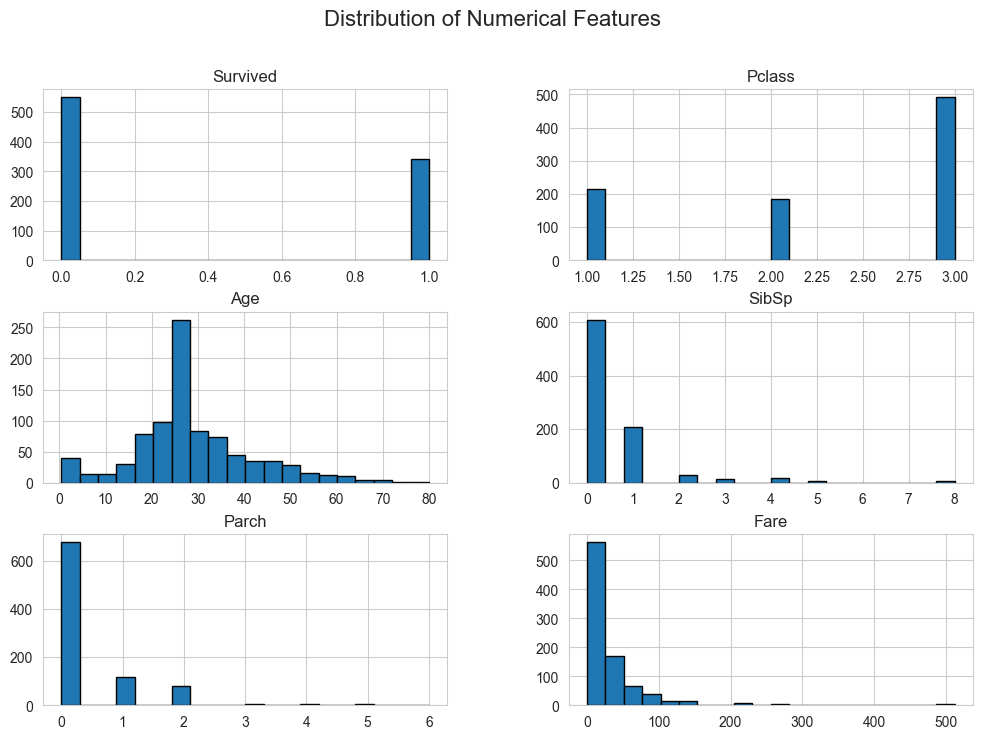

In [17]:
# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

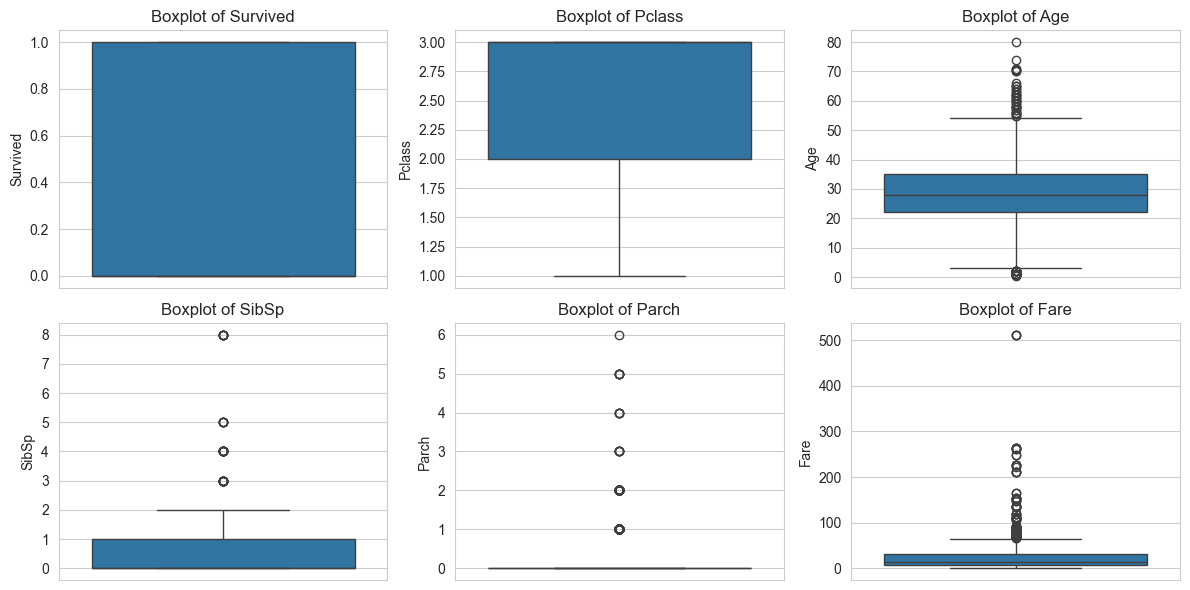

In [18]:
# Boxplots to detect outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

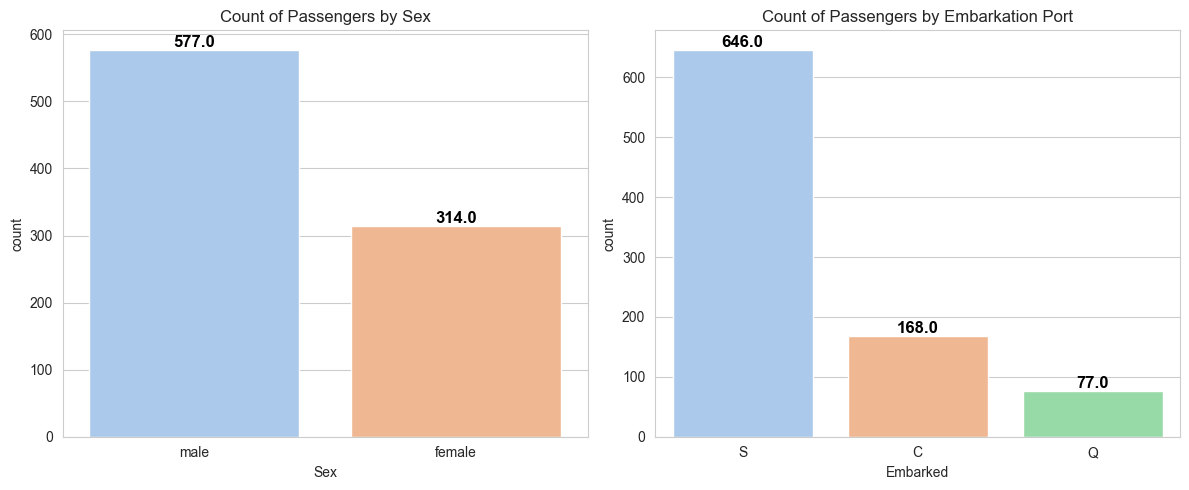

In [19]:
# Count plot for 'Sex' and 'Embarked' with count labels
plt.figure(figsize=(12, 5))

# Count plot for 'Sex'
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="Sex", hue="Sex", data=df, palette="pastel", legend=False)
plt.title("Count of Passengers by Sex")

# Add counts on bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Count plot for 'Embarked'
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="Embarked", hue="Embarked", data=df, palette="pastel", legend=False)
plt.title("Count of Passengers by Embarkation Port")

# Add counts on bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

## Task 6: Bivariate Analysis (Relationships Between Features)

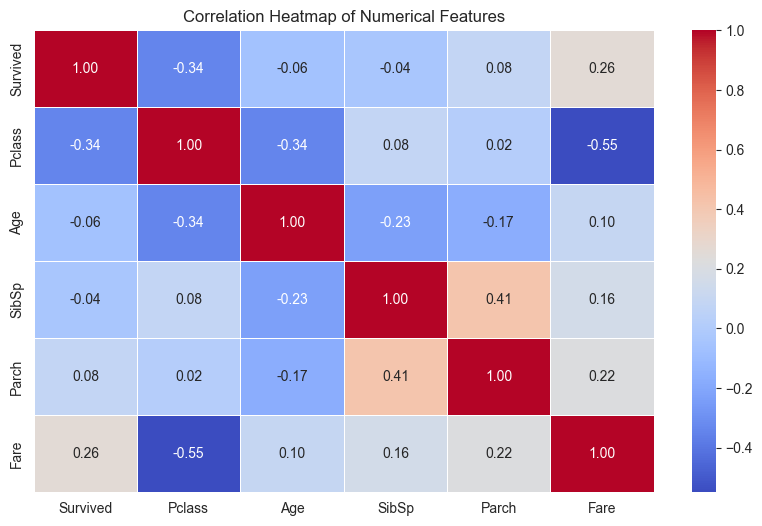

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

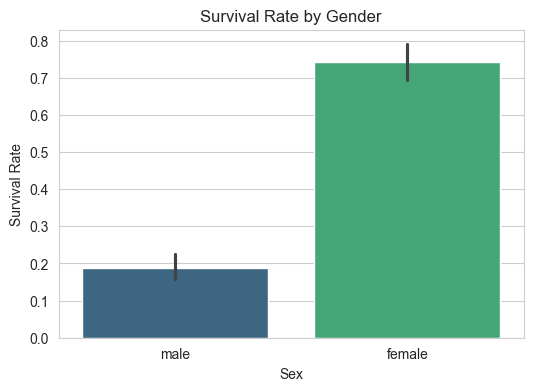

In [21]:
# Bar plot of survival by gender
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, palette="viridis", legend=False)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

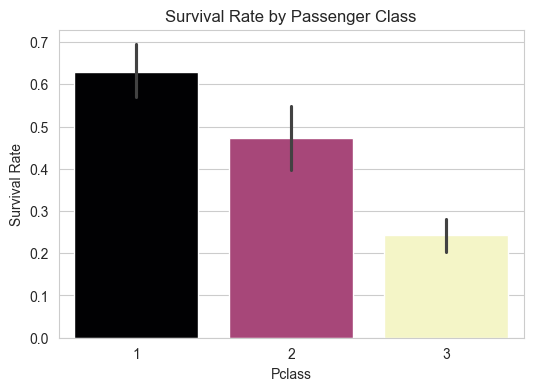

In [22]:
# Bar plot of survival by passenger class
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, palette="magma", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

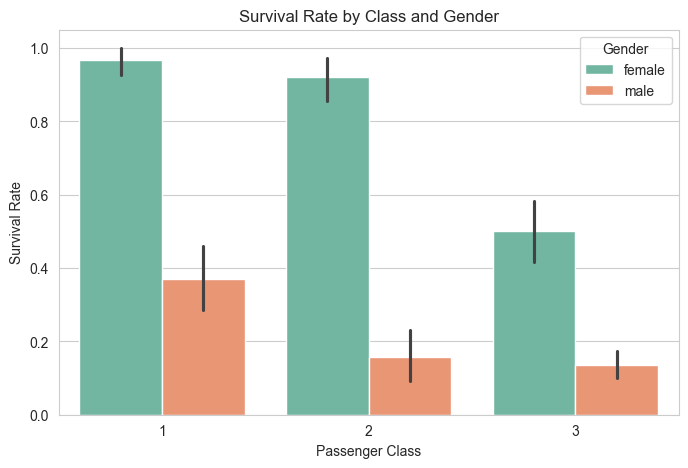

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, palette="Set2")
plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend(title="Gender")
plt.show()

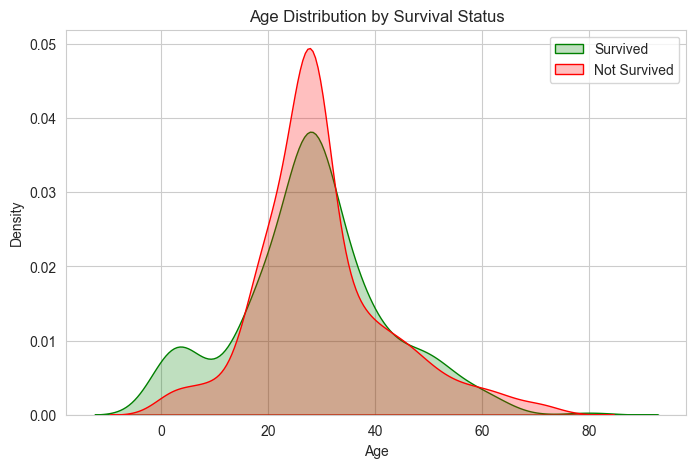

In [24]:
# KDE plot of Age distribution for Survived vs. Not Survived 
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Survived"] == 1]["Age"], label="Survived", fill=True, color="green")  # Changed shade -> fill
sns.kdeplot(df[df["Survived"] == 0]["Age"], label="Not Survived", fill=True, color="red")  # Changed shade -> fill
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

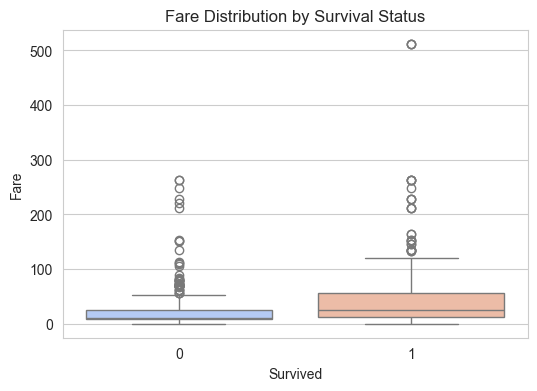

In [25]:
# Box plot of Fare distribution by survival status
plt.figure(figsize=(6, 4))
sns.boxplot(x="Survived", y="Fare", hue="Survived", data=df, palette="coolwarm", legend=False)
plt.title("Fare Distribution by Survival Status")
plt.show()

## Task 7: Outlier Detection and Handling

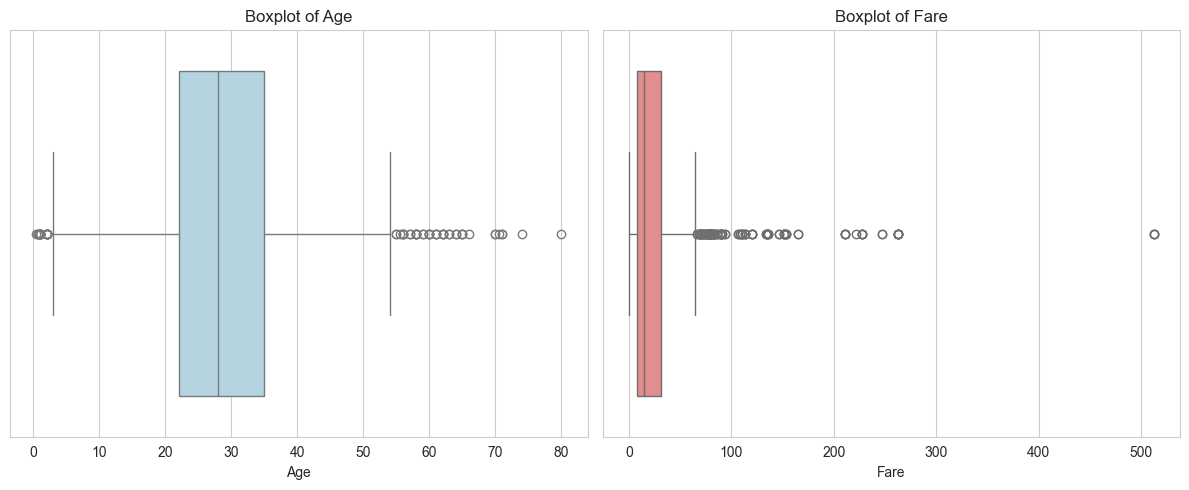

In [26]:
# Set figure size
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Age"], color="lightblue")
plt.title("Boxplot of Age")

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Fare"], color="lightcoral")
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()

In [27]:
# Detecting Outliers using Interquartile Range (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers in Age and Fare
outliers_age = detect_outliers_iqr(df, "Age")
outliers_fare = detect_outliers_iqr(df, "Fare")

print(f"Number of outliers in Age: {len(outliers_age)}")
print(f"Number of outliers in Fare: {len(outliers_fare)}")

Number of outliers in Age: 66
Number of outliers in Fare: 116


In [28]:
# Removing extreme outliers (Optional)
df = df[(df["Age"] >= df["Age"].quantile(0.05)) & (df["Age"] <= df["Age"].quantile(0.95))]
df = df[(df["Fare"] >= df["Fare"].quantile(0.05)) & (df["Fare"] <= df["Fare"].quantile(0.95))]

print("Outliers removed (if any).")

Outliers removed (if any).


In [29]:
# Detecting Outliers using Interquartile Range (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers in Age and Fare
outliers_age = detect_outliers_iqr(df, "Age")
outliers_fare = detect_outliers_iqr(df, "Fare")

print(f"Number of outliers in Age: {len(outliers_age)}")
print(f"Number of outliers in Fare: {len(outliers_fare)}")

Number of outliers in Age: 40
Number of outliers in Fare: 72


In [30]:
# Save the updated dataset to CSV
df.to_csv("updated_titanic.csv", index=False)

print("Updated dataset saved successfully!")


Updated dataset saved successfully!
